### 생선 분류
- 데이터 셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습 방법 : 지도학습 => 분류
- 알고리즘  : 최근접 이웃 알고리즘

[1] 데이터 준비

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [136]:
Data_File = '../Data/fish.csv'

# 행 : Bream, Smelt, 컬럼 : Species, Weight, Length => 0, 1, 2
fish = pd.read_csv(Data_File, usecols=[0,1,2])
fish

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [137]:
mask = (fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')
two_fish = fish[mask]
two_fish.reset_index(drop=True, inplace=True)
two_fish.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [138]:
# Species 컬럼을 수치화
name_dict = {name : idx + 1 for idx, name in enumerate(two_fish['Species'].unique())}
name_dict

{'Bream': 1, 'Smelt': 2}

In [139]:
two_fish.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [140]:
two_fish = two_fish.copy()
two_fish['fish_code'] = two_fish['Species'].replace(name_dict).to_list()
two_fish

,Species,Weight,Length,fish_code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1
5,Bream,450.0,29.7,1
6,Bream,500.0,29.7,1
7,Bream,390.0,30.0,1
8,Bream,450.0,30.0,1
9,Bream,500.0,30.7,1


[3] 피쳐와 타겟 분리

In [141]:
features = two_fish[['Weight', 'Length']]
target = two_fish['fish_code']
print(f'feature => {features.shape}, {features.ndim}D')
print(f'target  => {target.shape}, {target.ndim}D')

feature => (49, 2), 2D
target  => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
# train : test = 80 : 20 ==> train_size = 0.8 또는 test_size = 0.2
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8,
                                                    stratify=target)

In [144]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (39, 2), 2D
y_train : (39,), 1D
X_test : (10, 2), 2D
y_test : (10,), 1D


In [145]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts() / y_train.count()

fish_code
1    0.717949
2    0.282051
Name: count, dtype: float64

In [146]:
y_test.value_counts() / y_test.count()

fish_code
1    0.7
2    0.3
Name: count, dtype: float64

[3-2] 피쳐 스케일링

In [147]:
from sklearn.preprocessing import MinMaxScaler

In [148]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [149]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(X_train)

MinMaxScaler()

In [150]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_
# 정규화된 최소값, 최소값, 정규화된 최대값, 최대값

(array([-0.00704935, -0.3442623 ]),
 array([ 7. , 10.5]),
 array([0.00100705, 0.03278689]),
 array([1000.,   41.]))

In [151]:
# 학습용 데이터셋 ==> 스케일링
X_train_scaled = mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()

((39, 2), 0.0, 1.0000000000000002)

In [152]:
X_test_scaled = mmScaler.transform(X_test)
X_test.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), -0.022950819672131084, 1.0000000000000002)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습 진행 => fit()

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_jobs=-1)

In [155]:
# 학습 후 모델 파라미터
model.classes_, model.n_samples_fit_
# model.feature_names_in_ <== ndarray일 경우 컬럼명 X

(array([1, 2]), 39)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [156]:
model.score(X_test_scaled, y_test)

1.0

[6] 예측하기 ==> 학습/훈련과 테스트에 사용되지 않은 데이터를 사용
- 주의 : 입력 데이터 ==> 2D

In [157]:
new_data = pd.DataFrame([[413, 27.8]], columns=two_fish.columns[1:3])
new_data

,Weight,Length
0,413,27.8


In [158]:
mmScaler.data_range_, mmScaler.transform(new_data)

(array([993. ,  30.5]), array([[0.40886203, 0.56721311]]))

In [159]:
scaled_new_data = mmScaler.transform(new_data)

In [160]:
model.predict(scaled_new_data)

array([1])

In [161]:
distance, indexes = model.kneighbors(scaled_new_data)

In [162]:
distance

array([[0.06390103, 0.0725882 , 0.07575874, 0.08118665, 0.08497713]])

In [163]:
indexes

array([[ 2, 33, 31, 20, 34]])

In [164]:
neighbors = indexes.reshape(-1).tolist()
neighbors

[2, 33, 31, 20, 34]

In [171]:
[i[0] for i in X_train_scaled[neighbors]]

[0.3585095669687815,
 0.446122860020141,
 0.3856998992950655,
 0.446122860020141,
 0.3353474320241692]

In [174]:
k_weight = X_train_scaled[neighbors][:,0]
k_length = X_train_scaled[neighbors][:,1]

k_weight, k_length

(array([0.35850957, 0.44612286, 0.3856999 , 0.44612286, 0.33534743]),
 array([0.60655738, 0.6295082 , 0.63934426, 0.63934426, 0.52459016]))

In [183]:
scaled_new_data[0][1]

0.5672131147540984

array([6.77744209e-01, 0.00000000e+00, 3.58509567e-01, 6.07250755e-01,
       5.97180262e-01, 6.97885196e-01, 4.96475327e-01, 2.84994965e-01,
       5.72004028e-01, 3.02114804e-03, 6.44511581e-03, 5.23665660e-03,
       5.03524673e-04, 6.47532729e-01, 7.11983887e-01, 7.18026183e-01,
       1.00000000e+00, 3.35347432e-01, 7.23061430e-01, 1.71198389e-03,
       4.46122860e-01, 1.27895267e-02, 2.81973817e-03, 4.96475327e-01,
       2.81973817e-03, 9.49647533e-01, 8.48942598e-01, 6.82779456e-01,
       9.24471299e-01, 4.71299094e-01, 6.17321249e-01, 3.85699899e-01,
       1.29909366e-02, 4.46122860e-01, 3.35347432e-01, 4.96475327e-01,
       9.19436052e-01, 2.36656596e-01, 5.23665660e-03])

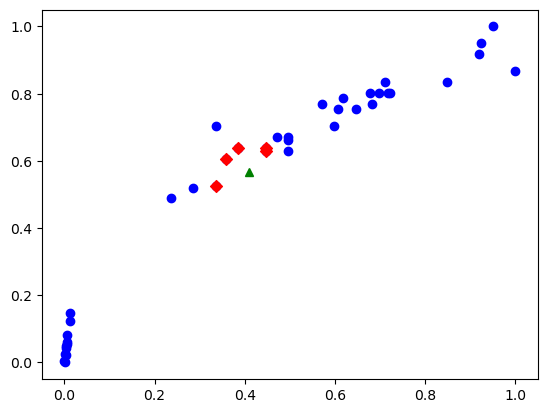

In [192]:
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개 피쳐 Weight, Length로 Bream, Smelt 분류 가능함
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], color = 'blue')
# plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], color = 'blue')

plt.scatter(k_weight, k_length, color = 'red', marker = 'D')

plt.plot(scaled_new_data[0][0], scaled_new_data[0][1], color = 'g', marker = '^')

plt.show()